# Part 0

This dataset contains the nba player stats per game from the 1997-98 season through 2021-22 season.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("NBA_Player_Stats.csv")
# Remove missing values
data.dropna(subset=['FG%'], inplace=True)
data.dropna(subset=['FG'], inplace=True)

In [62]:
data.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,...,13818.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000
mean,244.295202,26.711219,45.811943,21.696445,19.727159,2.949858,6.638674,0.432377,0.594484,1.713987,...,0.726303,0.915009,2.535154,3.448098,1.768064,0.624929,0.392537,1.138357,1.790183,7.900345
std,139.562405,4.253700,25.962361,27.065133,9.896987,2.128132,4.526012,0.104592,0.698783,1.840850,...,0.152547,0.804164,1.763381,2.429388,1.762455,0.438591,0.460867,0.785406,0.819945,5.826398
min,1.000000,18.000000,1.000000,0.000000,0.700000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,23.000000,22.000000,0.000000,11.600000,1.300000,3.100000,0.393000,0.000000,0.100000,...,0.660000,0.300000,1.300000,1.700000,0.600000,0.300000,0.100000,0.600000,1.200000,3.400000
50%,243.000000,26.000000,49.000000,7.000000,19.000000,2.400000,5.500000,0.435000,0.300000,1.100000,...,0.750000,0.700000,2.200000,2.900000,1.200000,0.500000,0.300000,1.000000,1.800000,6.400000
75%,361.000000,30.000000,70.000000,39.000000,27.700000,4.100000,9.200000,0.479000,1.000000,2.800000,...,0.822000,1.300000,3.300000,4.600000,2.400000,0.900000,0.500000,1.500000,2.400000,11.100000
max,605.000000,44.000000,85.000000,83.000000,43.700000,12.200000,27.800000,1.000000,5.300000,13.200000,...,1.000000,6.800000,12.000000,18.000000,12.800000,3.000000,6.000000,5.700000,6.000000,36.100000


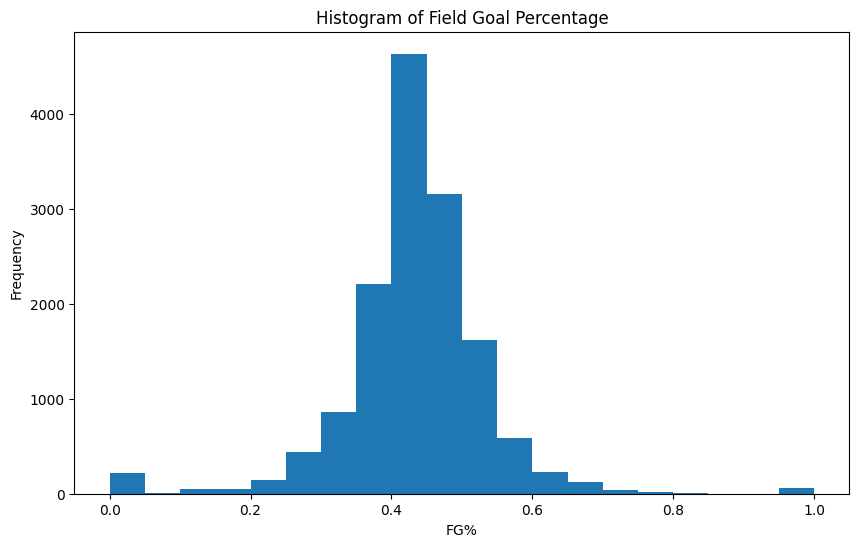

In [63]:
# Plot the histogram of field goal percentage
plt.figure(figsize=(10, 6))
plt.hist(data['FG%'], bins=20)
plt.title('Histogram of Field Goal Percentage')
plt.xlabel('FG%')
plt.ylabel('Frequency')
plt.show()

# Part 1

In [64]:
theta_0,tau = 0.43,0.10; alpha,beta = 1,0.1

import pymc as pm
normal_gamma_model = pm.Model()
with normal_gamma_model:
    theta = pm.Normal("theta", mu=theta_0, sigma=tau)
    phi = pm.Gamma("phi", alpha=alpha, beta=beta)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=data['FG%'])

In [65]:
with normal_gamma_model:
    idata_HMC = pm.sample()

HMC Split-Rhats {'theta': 1.0018, 'phi': 0.9996} | 

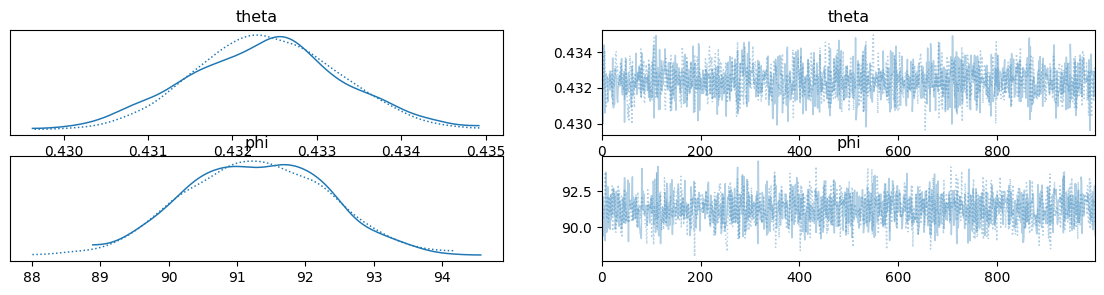

In [68]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots(2,2, figsize=(14,3))
az.plot_trace(idata_HMC, axes=ax[:2,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | ')

In [69]:
idata_HMC.posterior['phi'].values.flatten().shape[-1]
az.summary(idata_HMC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.43,0.00,0.43,0.43,0.00,0.00,2183.02,1341.31,1.0
phi,91.30,1.03,89.47,93.26,0.02,0.02,2236.09,1404.91,1.0


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

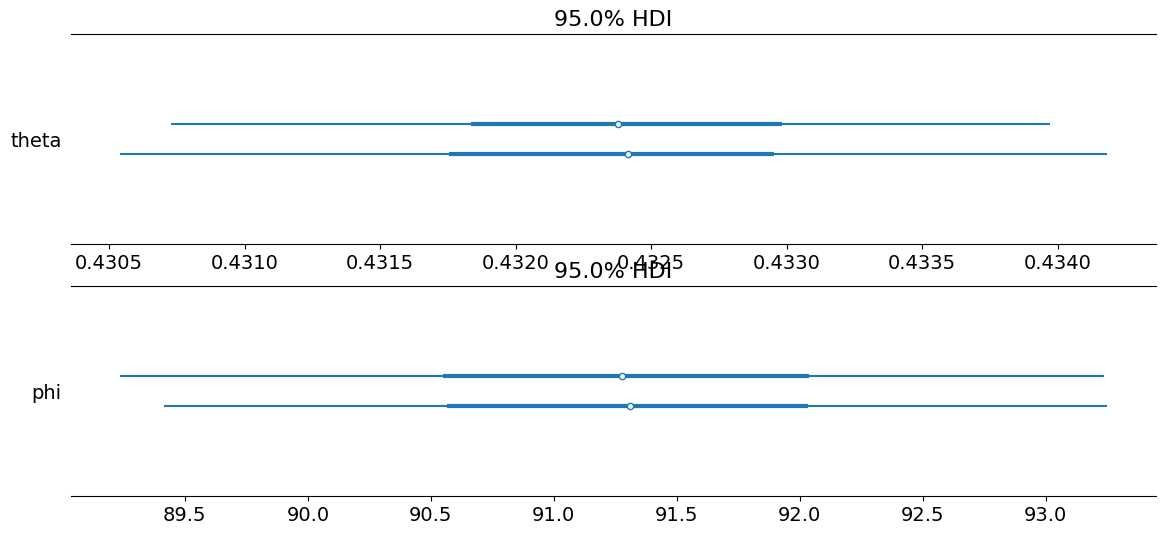

In [70]:
import arviz as az; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2,1, figsize=(14,6))
az.plot_forest(idata_HMC, var_names=["theta"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(idata_HMC, var_names=["phi"], combined=False, hdi_prob=0.95, ax=ax[1])

# Part 2

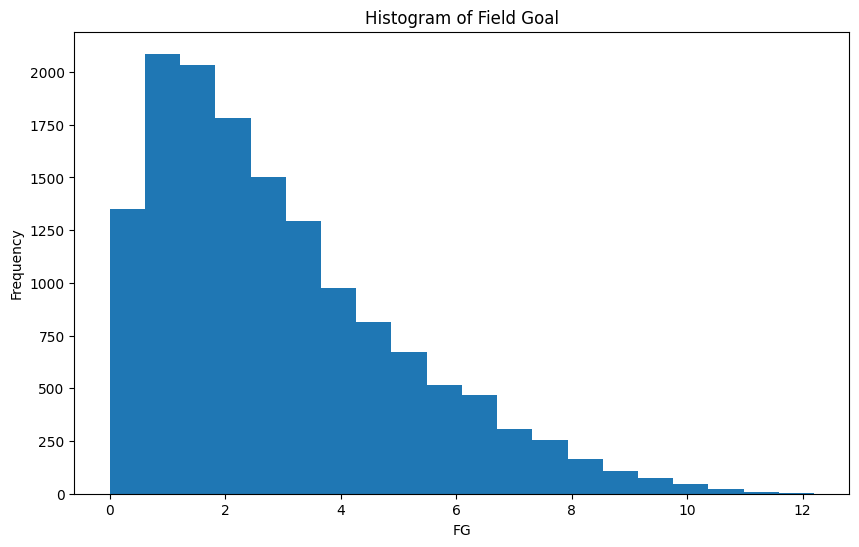

In [84]:
# Plot the histogram of field goal percentage
plt.figure(figsize=(10, 6))
plt.hist(data['FG'], bins=20)
plt.title('Histogram of Field Goal')
plt.xlabel('FG')
plt.ylabel('Frequency')
plt.show()

According to the histogram, the data looks like gamma-distributed.

# Part 3

In [89]:
import pymc as pm
gamma_model = pm.Model()
with gamma_model:
  alpha = pm.Gamma('alpha', alpha=1, beta=0.5)
  beta = pm.Gamma('beta', alpha=1, beta=0.5)
  x_obs = pm.Gamma('likelihood', alpha=alpha, beta=beta, observed= data['FG'])

In [90]:
with normal_gamma_model:
    idata_HMC = pm.sample()

# Part 4

HMC Split-Rhats {'theta': 0.9995, 'phi': 1.0028} | 

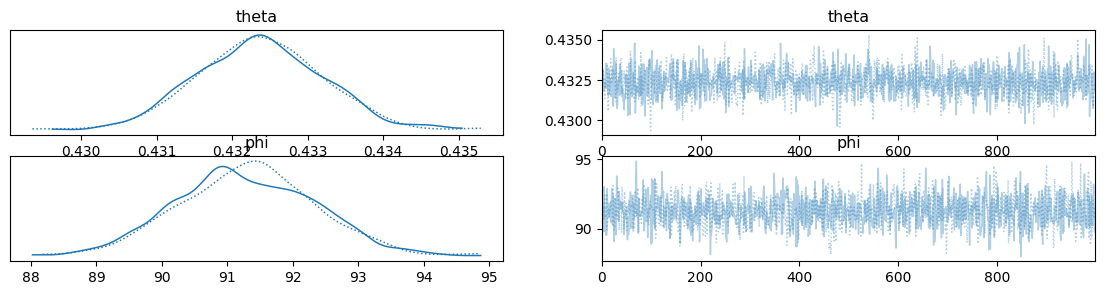

In [91]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots(2,2, figsize=(14,3))
az.plot_trace(idata_HMC, axes=ax[:2,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | ')

In [92]:
idata_HMC.posterior['phi'].values.flatten().shape[-1]
az.summary(idata_HMC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.43,0.00,0.43,0.43,0.00,0.00,1819.50,1556.47,1.0
phi,91.30,1.06,89.34,93.21,0.03,0.02,1743.72,1138.49,1.0


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

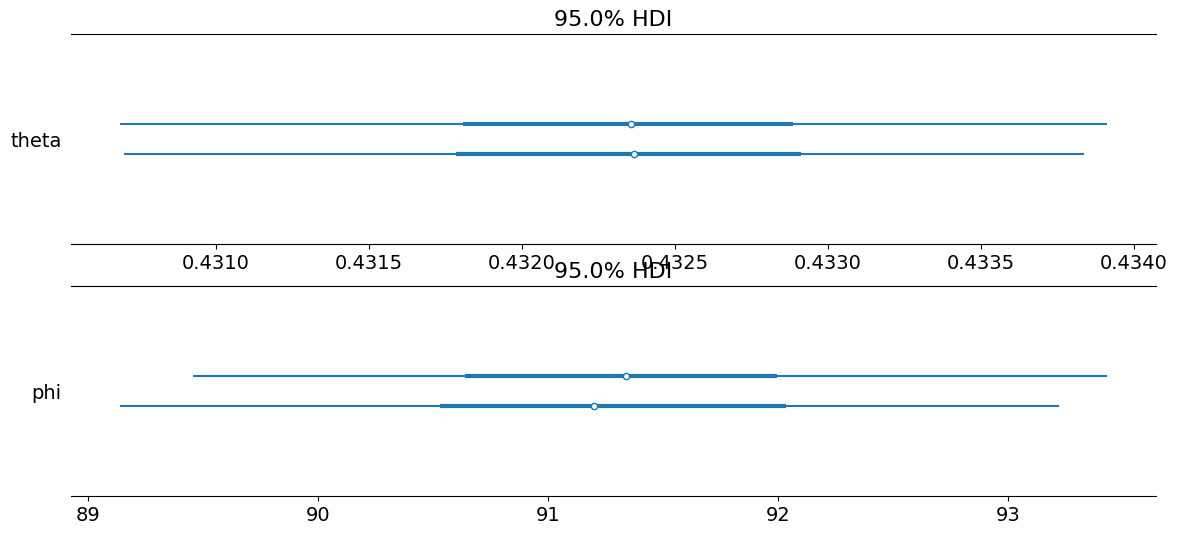

In [93]:
import arviz as az; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2,1, figsize=(14,6))
az.plot_forest(idata_HMC, var_names=["theta"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(idata_HMC, var_names=["phi"], combined=False, hdi_prob=0.95, ax=ax[1])